# Section 4.8 - Venus SmallSat Aerocapture - Orbiter Deflection Maneuver

In [1]:
import numpy as np
from astropy.time import Time
from AMAT.arrival import Arrival

ModuleNotFoundError: No module named 'astropy'

In [2]:
arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='VENUS',
                                      lastFlybyDate=Time("2010-05-10 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2010-12-06 00:00:00", scale='tdb'),
                                      ephem_file='../../../spice-data/de432s.bsp')

In [3]:
print("Arrival v_inf vector, ICRF: "+str(arrival.v_inf_vec)+" km/s")
print("Arrival VINF MAG: "+str(round(arrival.v_inf_mag, 2))+" km/s.")
print("Arrival Declination: "+str(round(arrival.declination, 2))+" deg.")

Arrival v_inf vector, ICRF: [-3.26907095  0.67649492 -1.06977471] km/s
Arrival VINF MAG: 3.51 km/s.
Arrival Declination: -21.93 deg.


In [4]:
import numpy as np
from AMAT.approach import Approach

In [5]:
approach1 = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+103.85)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=150e3)

approach2 = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+400)*1e3, psi=np.pi)

/home/athul/Documents/Codes/AMAT/venv/lib/python3.8/site-packages/AMAT-2.2.20-py3.8.egg/AMAT/approach.py:480: RuntimeWarning: invalid value encountered in arccos
  gamma = -1*np.arccos(self.h/(r_mag_bi*v_mag_bi))


In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

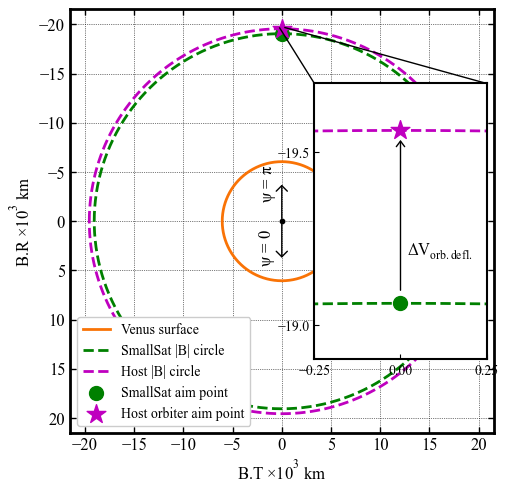

In [46]:
fig = plt.figure()
fig.set_size_inches([5.5, 5.5])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

theta_arr = np.linspace(0, 2*np.pi, 1001)
X_VENUS = approach1.planetObj.RP*np.cos(theta_arr)/1e3
Y_VENUS = approach1.planetObj.RP*np.sin(theta_arr)/1e3



plt.plot(X_VENUS/1e3, Y_VENUS/1e3, color='xkcd:orange', linestyle='solid', linewidth=2.0, label='Venus surface')

BR1 = np.dot(approach1.b_mag*approach1.B_vec_bi_unit, approach1.R_vec_bi_unit)
BT1 = np.dot(approach1.b_mag*approach1.B_vec_bi_unit, approach1.T_vec_bi_unit)

BR2 = np.dot(approach2.b_mag*approach2.B_vec_bi_unit, approach2.R_vec_bi_unit)
BT2 = np.dot(approach2.b_mag*approach2.B_vec_bi_unit, approach2.T_vec_bi_unit)



X_SS = (BR1/1e6)*np.cos(theta_arr)
Y_SS = (BR1/1e6)*np.sin(theta_arr)
plt.plot(X_SS, Y_SS, color='g', linestyle='dashed', linewidth=2.0, label='SmallSat |B| circle')

X_HS = (BR2/1e6)*np.cos(theta_arr)
Y_HS = (BR2/1e6)*np.sin(theta_arr)
plt.plot(X_HS, Y_HS, color='m', linestyle='dashed', linewidth=2.0, label='Host |B| circle')

plt.scatter(BT1/1e6, BR1/1e6, marker="o", s=100, color='g', label='SmallSat aim point', zorder=10 )
plt.scatter(BT2/1e6, BR2/1e6, marker="*", s=200, color='m', label='Host orbiter aim point', zorder=10 )

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')

plt.xlabel('B.T '+r'$\times 10^3$'+ ' km' ,fontsize=12)
plt.ylabel('B.R '+r'$\times 10^3$'+ ' km' ,fontsize=12)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=1, length=4)
ax.yaxis.set_tick_params(width=1, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

plt.annotate("", xy=(0, 4), xytext=(0, 0), va="center", ha="center",
                 arrowprops=dict(arrowstyle='->, head_width=0.4', facecolor='blue'))
plt.text(-2.5, 4, r'$\psi$'+ ' = ' + r'$0$', rotation=90, fontsize=12)

plt.annotate("", xy=(0, -4), xytext=(0, 0), va="center", ha="center",
                 arrowprops=dict(arrowstyle='->, head_width=0.4', facecolor='blue'))
plt.text(-2, -2.5, r'$\psi$'+ ' = ' + r'$\pi$', rotation=90, fontsize=12)

plt.scatter(0, 0, marker="o", s=10, color='k')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
plt.legend(loc='lower left', fontsize=10, framealpha=1)

axins = zoomed_inset_axes(ax, 35, loc=7, axes_kwargs={'zorder':2})
axins.set_xlim(-0.25, 0.25)
axins.set_ylim(-19.7, -18.9)
axins.plot(X_SS, Y_SS, color='g', linestyle='dashed', linewidth=2.0)
axins.plot(X_HS, Y_HS, color='m', linestyle='dashed', linewidth=2.0)
axins.scatter(BT1/1e6, BR1/1e6, marker="o", s=100, color='g')
axins.scatter(BT2/1e6, BR2/1e6, marker="*", s=200, color='m')
axins.annotate('', xy=(BT2/1e6, 0.999*BR2/1e6), xytext=(BT1/1e6, BR1/1e6),
               va="center", ha="center",
               arrowprops=dict(arrowstyle='->, head_width=0.3', facecolor='blue'), fontsize=10, color='k',
               bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))
axins.text(0.02, -19.2, r'$\Delta V_{orb. defl.}$', rotation=0, fontsize=12)

axins.invert_yaxis()

patch, pp1, pp2 = mark_inset(ax, axins,loc1=1,loc2=1, fc="none", ec="k", linestyle='solid', linewidth = 1, zorder=0.0)
pp1.loc1 = 1
pp1.loc2 = 4
pp2.loc1 = 2
pp2.loc2 = 3
plt.draw()

axins.yaxis.get_major_locator().set_params(nbins=1)
axins.xaxis.get_major_locator().set_params(nbins=1)

plt.setp(axins.get_xticklabels(), visible=True)
plt.setp(axins.get_yticklabels(), visible=True)

axins.xaxis.set_tick_params(direction='in', which='both')
axins.yaxis.set_tick_params(direction='in', which='both')

for axis in ['top', 'bottom', 'left', 'right']:
    axins.spines[axis].set_linewidth(1.5)

axins.tick_params(axis='both', which='major', labelsize=10)

plt.draw()


plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-b-plane.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-b-plane.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-b-plane.eps', dpi=300,bbox_inches='tight')


plt.show()

In [9]:
import numpy as np
from AMAT.maneuver import ProbeOrbiterDeflection

In [17]:
r_dv_rp_arr = np.linspace(30, 381, 101)
psi_arr = np.linspace(0, 2*np.pi, 61)

dv_arr = np.zeros((len(r_dv_rp_arr), len(psi_arr)))
tof_arr = np.zeros(len(r_dv_rp_arr))

for i, r_dv_rp in enumerate(r_dv_rp_arr):
    for j, psi in enumerate(psi_arr):
        deflection = ProbeOrbiterDeflection(arrivalPlanet="VENUS",
                                    v_inf_vec_icrf_kms=arrival.v_inf_vec,
                                    rp_probe=(6051.8+103.85)*1e3,  psi_probe=np.pi, h_EI_probe=150e3,
                                    rp_space=(6051.8+250)*1e3, psi_space=psi,
                                    r_dv_rp=r_dv_rp)
        dv_arr[i,j] = deflection.dv_maneuver_mag
        tof_arr[i] = deflection.TOF_probe

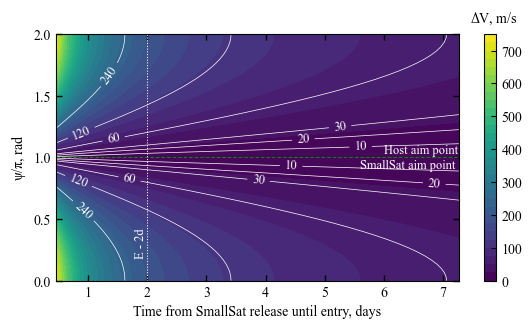

In [30]:
X, Y = np.meshgrid(tof_arr, psi_arr/np.pi)


fig = plt.figure()
fig.set_size_inches([6.5, 3.20])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


csf = plt.contourf(X, Y, np.transpose(dv_arr), cmap='viridis', levels=30)
cbar=plt.colorbar(csf)
cbar.set_label(r'$\Delta V$' + ', m/s', labelpad=-20, y=1.10, rotation=0, fontsize=10)
cbar.ax.tick_params(axis='y', direction='in')

ax=plt.gca()
cs = ax.contour(X, Y, np.transpose(dv_arr), colors='w', levels=np.array([10, 20, 30, 60, 120, 240]), 
                linewidths=0.5)
ax.clabel(cs, fmt='%2d', colors='w', fontsize=9)

plt.xlabel('Time from SmallSat release until entry, days' ,fontsize=10)
plt.ylabel(r'$\psi/\pi$'+', rad', fontsize=10)

plt.yticks(np.array([0, 0.5, 1, 1.5, 2.0]), fontsize=10)
plt.xticks(fontsize=10)

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=1, length=4)
ax.yaxis.set_tick_params(width=1, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')

plt.axhline(y=1.0, color='g', linestyle='dashed', linewidth=0.75)
plt.axvline(x=2, color='w', linestyle='dotted', linewidth=0.75)

plt.text(5.6, 0.91, 'SmallSat aim point', color='w', fontsize=9)
plt.text(6.0, 1.03, 'Host aim point', color='w', fontsize=9)
plt.text(1.8, 0.2, 'E - 2d', color='w', rotation=90, fontsize=9)

plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-deflection-dv.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-deflection-dv.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-deflection-dv.eps', dpi=300,bbox_inches='tight')

    
plt.show()

In [31]:
deflection = ProbeOrbiterDeflection(arrivalPlanet="VENUS",
                                    v_inf_vec_icrf_kms=np.array([-3.26907094,  0.67649494, -1.0697747 ]),
                                    rp_probe=(6051.8+103.85)*1e3, psi_probe=np.pi, h_EI_probe=150e3,
                                    rp_space=(6051.8 + 250) * 1e3, psi_space=np.pi,
                                    r_dv_rp=112.5)

In [32]:
print("Divert manuever DV: "+str(deflection.dv_maneuver_vec)+ " m/s")
print("Divert manuever DV magnitude: "+str(round(deflection.dv_maneuver_mag,3))+ " m/s")

Divert manuever DV: [-0.47623891  0.05193851  1.18872597] m/s
Divert manuever DV magnitude: 1.282 m/s


In [33]:
print("TOF from probe release to atm. entry interface: "+str(round(deflection.TOF_probe,6))+ " days")
print("TOF from probe release to orbiter periapsis   : "+str(round(deflection.TOF_space,6))+ " days")

TOF from probe release to atm. entry interface: 2.003604 days
TOF from probe release to orbiter periapsis   : 2.003976 days


Run the following code to generate the approach trajectory plot. The code is also available in the file ```section-4-8-venus-smallsat-orbiter-deflection.py```.

```
from mayavi import mlab
import numpy as np
from tvtk.tools import visual
from AMAT.approach import Approach
from astropy.time import Time
from AMAT.arrival import Arrival

def Arrow_From_A_to_B(x1, y1, z1, x2, y2, z2):
    ar1 = visual.arrow(x=x1, y=y1, z=z1)
    ar1.length_cone = 0.4

    arrow_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    ar1.actor.scale = [arrow_length, arrow_length, arrow_length]
    ar1.pos = ar1.pos / arrow_length
    ar1.axis = [x2 - x1, y2 - y1, z2 - z1]
    return ar1

arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='VENUS',
                                      lastFlybyDate=Time("2010-05-10 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2010-12-06 00:00:00", scale='tdb'),
                                      ephem_file='../../../spice-data/de432s.bsp')



probe = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+103.85)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=150e3)

space = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+400)*1e3, psi=np.pi)
north_pole_bi_vec = probe.ICRF_to_BI(arrival.north_pole)

theta_star_arr_probe = np.linspace(-2, probe.theta_star_entry, 101)
pos_vec_bi_arr_probe = probe.pos_vec_bi(theta_star_arr_probe)/6051.8e3


theta_star_arr_space = np.linspace(-2, 0.0, 101)
pos_vec_bi_arr_space = space.pos_vec_bi(theta_star_arr_space)/6051.8e3

x_arr_probe = pos_vec_bi_arr_probe[0][:]
y_arr_probe = pos_vec_bi_arr_probe[1][:]
z_arr_probe = pos_vec_bi_arr_probe[2][:]

x_arr_space = pos_vec_bi_arr_space[0][:]
y_arr_space = pos_vec_bi_arr_space[1][:]
z_arr_space = pos_vec_bi_arr_space[2][:]


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1*np.outer(np.cos(u), np.sin(v))
y = 1*np.outer(np.sin(u), np.sin(v))
z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.02478929103*np.outer(np.cos(u), np.sin(v))
y1 = 1.024789291032*np.outer(np.sin(u), np.sin(v))
z1 = 1.02478929103*np.outer(np.ones(np.size(u)), np.cos(v))


x_ring_1 = 1.1*np.cos(u)
y_ring_1 = 1.1*np.sin(u)
z_ring_1 = 0.0*np.cos(u)

x_ring_2 = 1.2*np.cos(u)
y_ring_2 = 1.2*np.sin(u)
z_ring_2 = 0.0*np.cos(u)

mlab.figure(bgcolor=(0,0,0))
s1 = mlab.mesh(x, y, z, color=(0.34,0.33,0.33))
s2 = mlab.mesh(x1, y1, z1, color=(0.34, 0.33,0.33), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1,1,1), line_width=1, tube_radius=None)
#r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1,1,1), line_width=1, tube_radius=None)

p1 = mlab.plot3d(x_arr_probe, y_arr_probe, z_arr_probe, color=(0,1,0), line_width=3, tube_radius=None)
p2 = mlab.plot3d(x_arr_space, y_arr_space, z_arr_space, color=(1,0,1), line_width=3, tube_radius=None)


mlab.plot3d([0, 1.05 * north_pole_bi_vec[0]],
                   [0, 1.05 * north_pole_bi_vec[1]],
                   [0, 1.05 * north_pole_bi_vec[2]])

mlab.show()

```

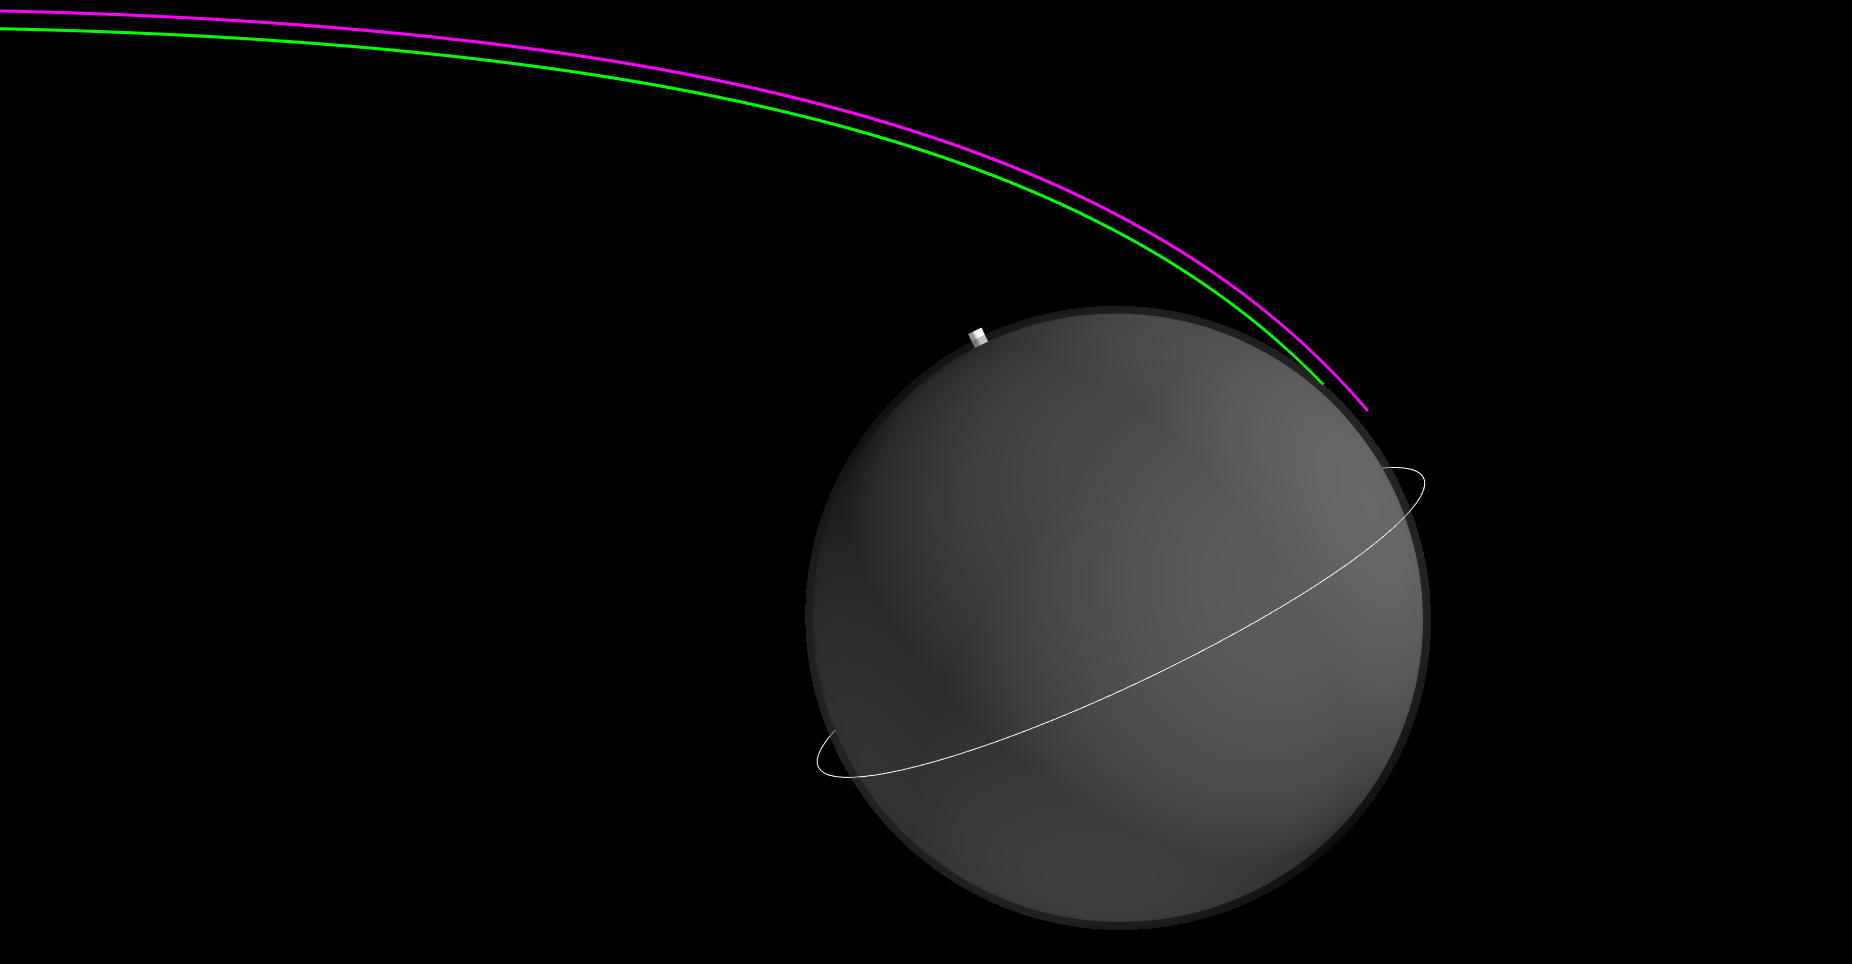

In [138]:
from IPython.display import Image
Image(filename='../../../plots/venus-smallsat-and-orbiter-approach.png', width=1200)